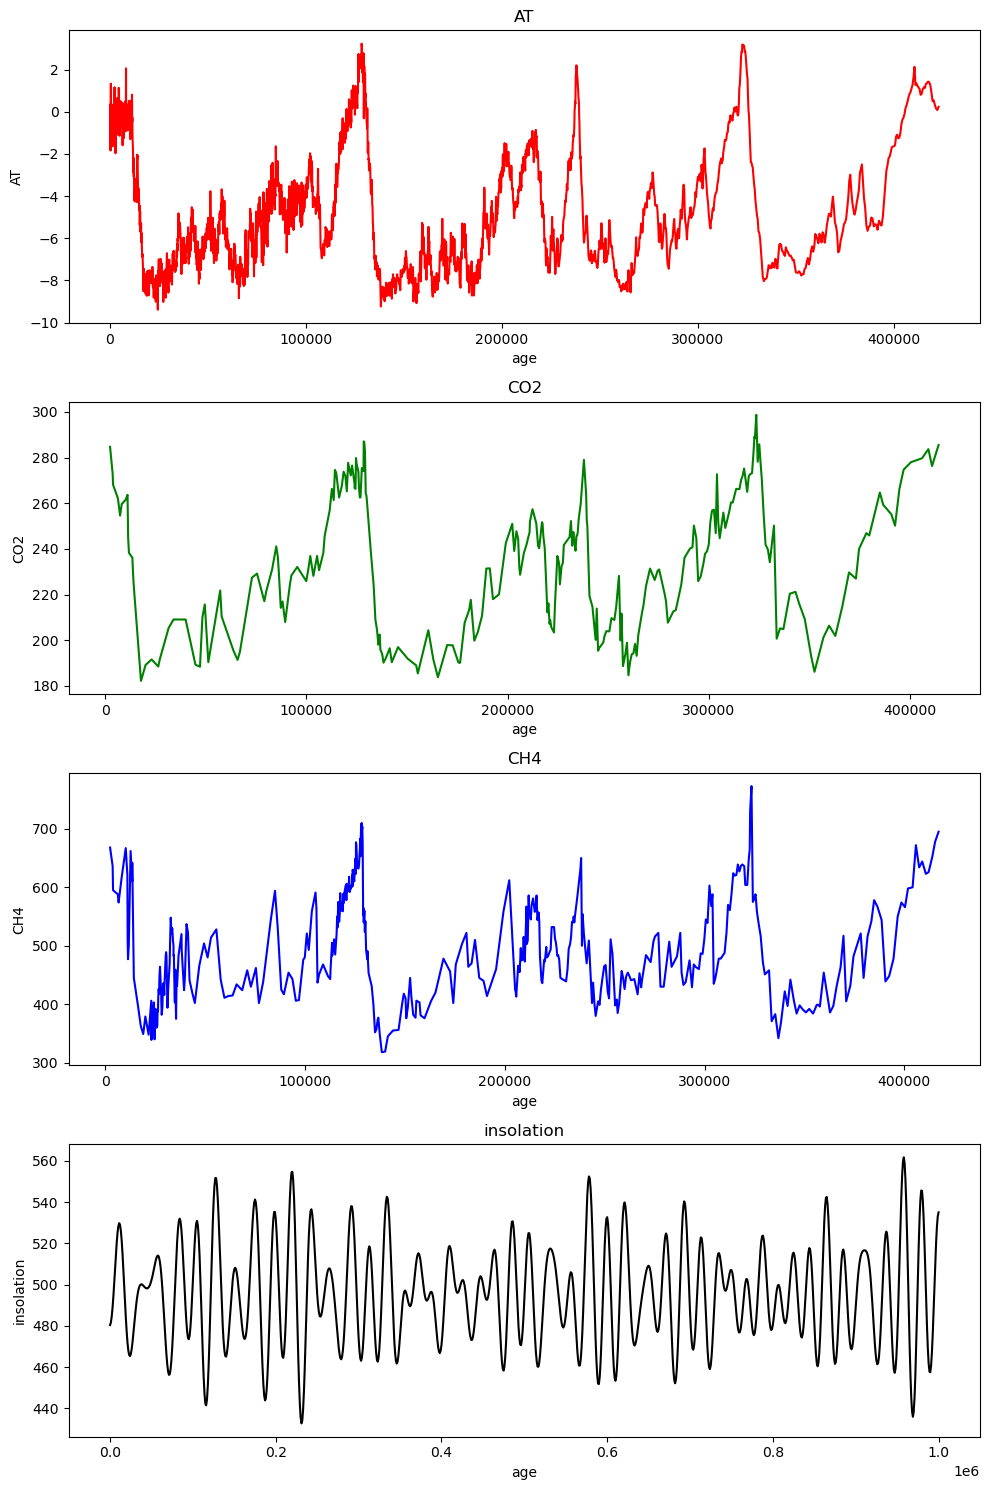

AT age min:  50.0
AT age max:  422816.0
CO2 age min:  2392
CO2 age max:  414135
CH4 age min:  2347
CH4 age max:  417173
insolation age min:  -0.0
insolation age max:  1000000.0
DataFrame: AT
     age   AT
0   50.0  0.0
1   67.0  0.0
2   85.0  0.0
3  103.0  0.0
4  122.0  0.0

DataFrame: CO2
    age    CO2
0  2392  284.7
1  3684  272.8
2  3883  268.1
3  6270  262.2
4  7377  254.6

DataFrame: CH4
    age  CH4
0  2347  668
1  3634  636
2  3833  595
3  6225  588
4  6614  574

DataFrame: insolation
      age        inso
0    -0.0  480.394908
1  1000.0  481.727752
2  2000.0  484.626343
3  3000.0  488.902144
4  4000.0  494.323301


In [1]:
import pandas as pd

df_AT = pd.read_csv('D:/VScode/van2015_repeat/VOSTOK_data/Vostok_Deut_dT.tab', sep='\t', skiprows=16)
df_CO2 = pd.read_csv('D:/VScode/van2015_repeat/VOSTOK_data/Vostok_CO2.txt', sep='\t', skiprows=0)
df_CH4 = pd.read_csv('D:/VScode/van2015_repeat/VOSTOK_data/Vostok_CH4.txt', sep='\t', skiprows=0)
# # extract the second and last columns and rename to age and AT
df_AT = df_AT.iloc[:, [1, -1]]
df_AT.columns = ['age', 'AT']
# age=age*1000
df_AT['age'] = df_AT['age']*1000
df_AT['age'] = df_AT['age'] + 50

df_CO2 = df_CO2.iloc[:, :2]
df_CO2.columns = ['age', 'CO2']
df_CO2['age'] = df_CO2['age'] + 50

df_CH4 = df_CH4.iloc[:, :2]
df_CH4.columns = ['age', 'CH4'] 

file_path = r"D:\VScode\van2015_repeat\VOSTOK_data\65N_inso_June21.txt"
df_inso = pd.read_csv(file_path, sep='\s+', header=None, engine='python')
df_inso.columns = ['age', 'inso']
df_inso['age'] = df_inso['age'] * -1000

# flip the columns unpside down and reset the index
df_inso = df_inso[::-1].reset_index(drop=True)


# plot time series in subplots
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(10, 15))

axs[0].plot(df_AT['age'], df_AT['AT'], color='r')
axs[0].set_title('AT')
axs[0].set_xlabel('age')
axs[0].set_ylabel('AT')

axs[1].plot(df_CO2['age'], df_CO2['CO2'], color='g')
axs[1].set_title('CO2')
axs[1].set_xlabel('age')
axs[1].set_ylabel('CO2')

axs[2].plot(df_CH4['age'], df_CH4['CH4'], color='b')
axs[2].set_title('CH4')
axs[2].set_xlabel('age')
axs[2].set_ylabel('CH4')

axs[3].plot(df_inso['age'], df_inso['inso'], color='k')
axs[3].set_title('insolation')
axs[3].set_xlabel('age')
axs[3].set_ylabel('insolation')

plt.tight_layout()
plt.show()



# print the age min and max for each DataFrame  
print("AT age min: ", df_AT['age'].min())
print("AT age max: ", df_AT['age'].max())
print("CO2 age min: ", df_CO2['age'].min())
print("CO2 age max: ", df_CO2['age'].max())
print("CH4 age min: ", df_CH4['age'].min())
print("CH4 age max: ", df_CH4['age'].max())
print("insolation age min: ", df_inso['age'].min())
print("insolation age max: ", df_inso['age'].max())

# Print out the first few rows for a quick check
print("DataFrame: AT")
print(df_AT.head())

print("\nDataFrame: CO2")
print(df_CO2.head())

print("\nDataFrame: CH4")
print(df_CH4.head())

print("\nDataFrame: insolation")
print(df_inso.head())

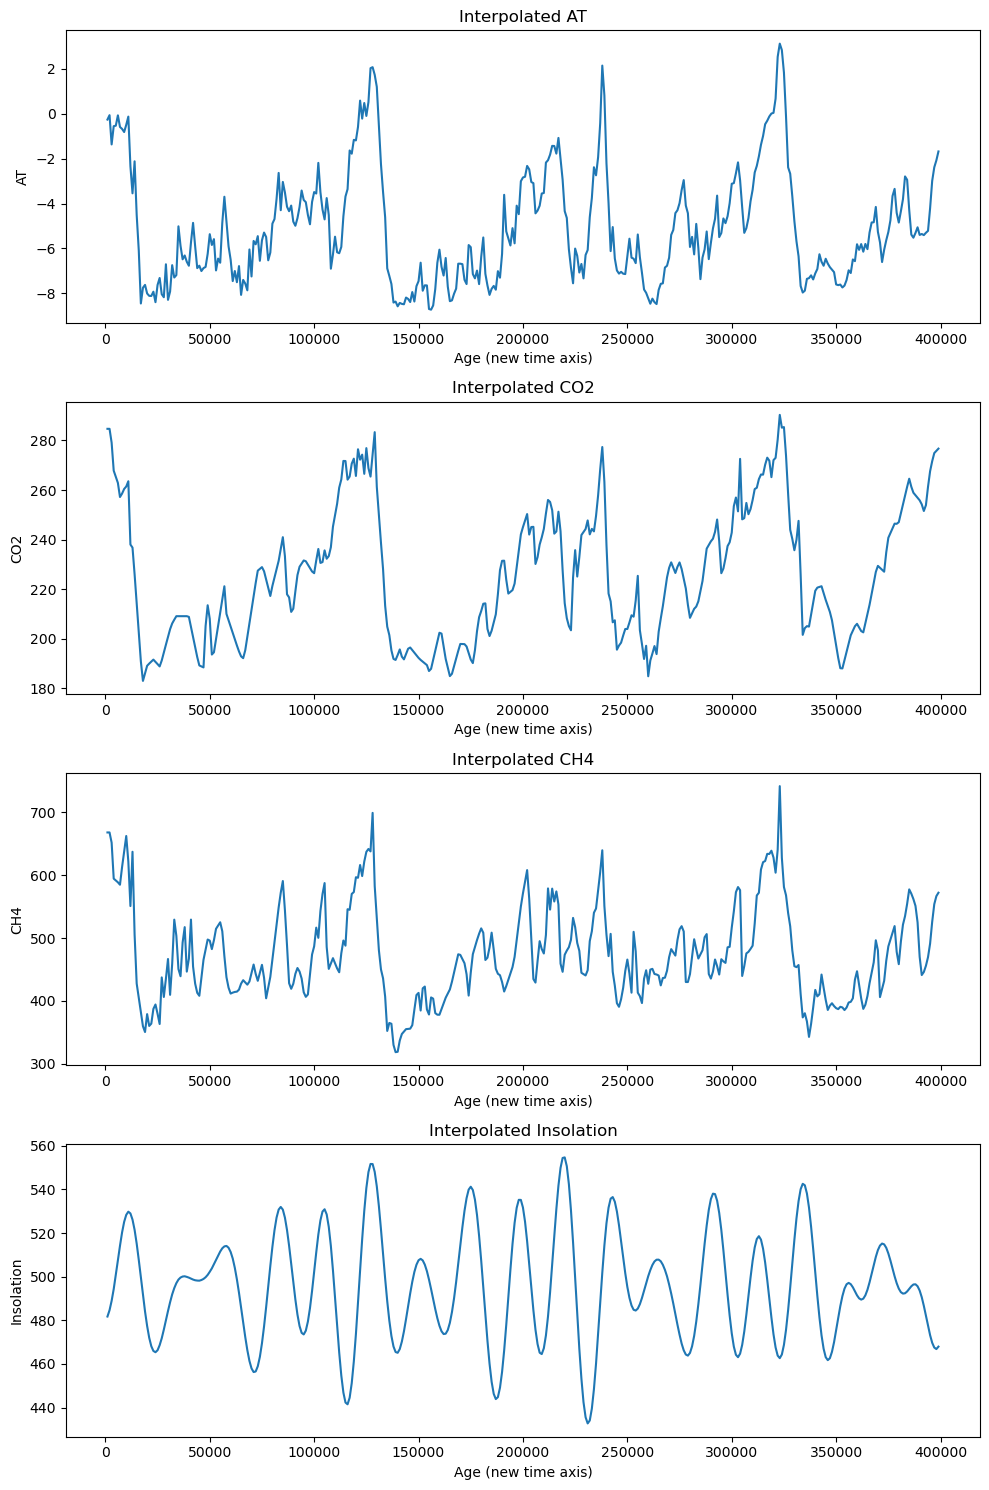

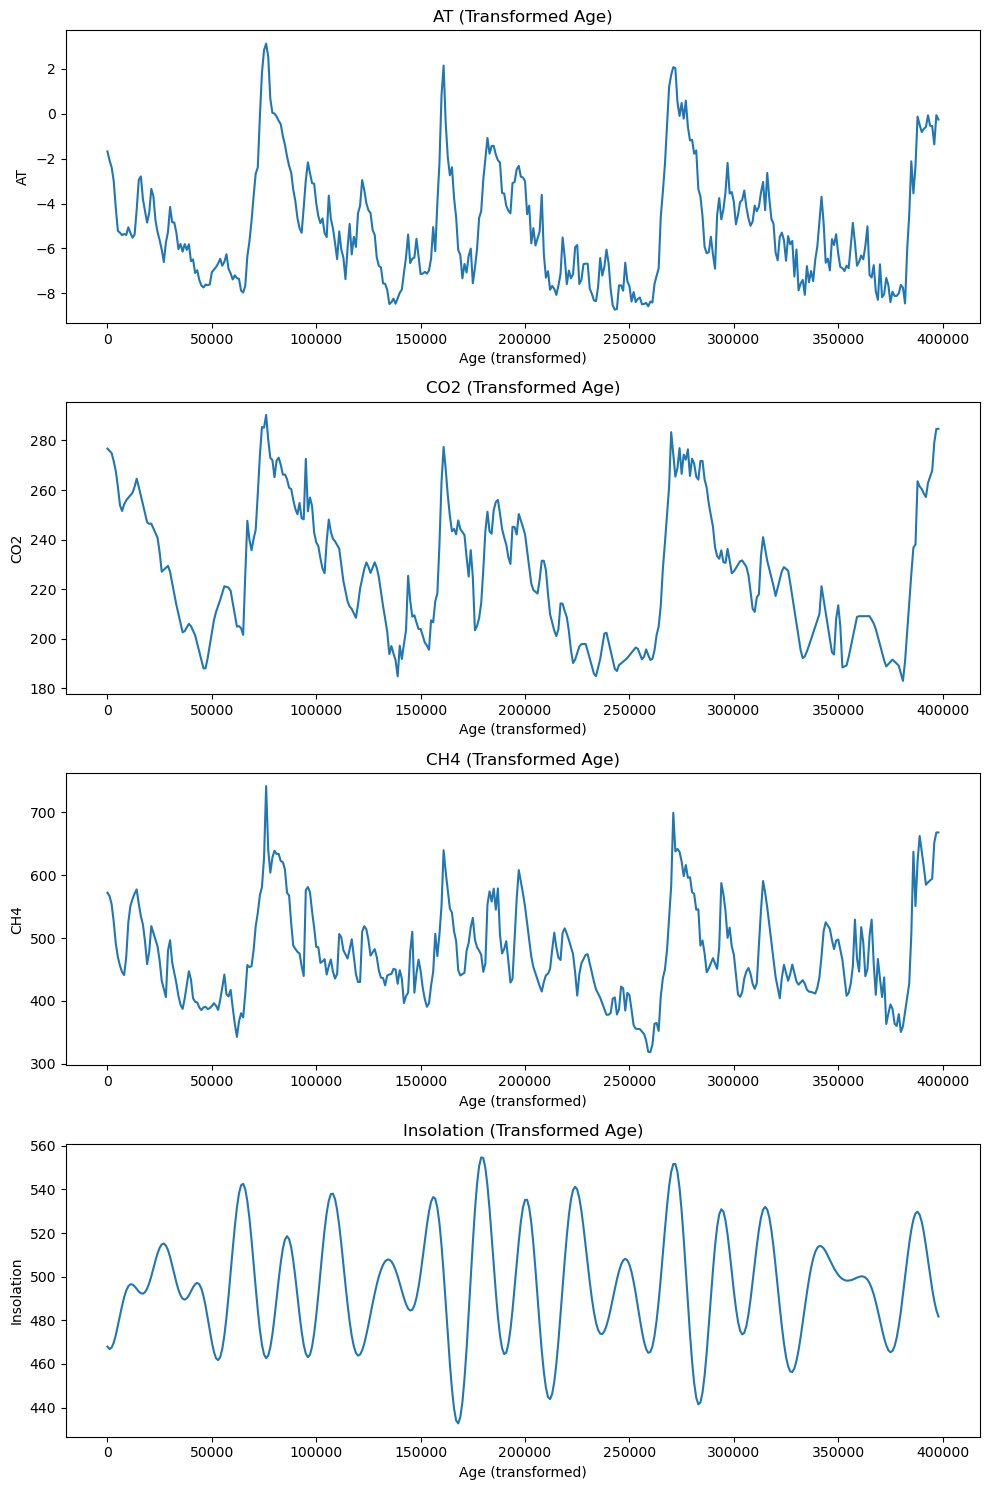

time_new: [ 1000  2000  3000  4000  5000  6000  7000  8000  9000 10000] ... [390000 391000 392000 393000 394000 395000 396000 397000 398000 399000]
time_new_transformed: [398000 397000 396000 395000 394000 393000 392000 391000 390000 389000] ... [9000 8000 7000 6000 5000 4000 3000 2000 1000    0]
AT_interpolated shape: (399,)
CO2_interpolated shape: (399,)
CH4_interpolated shape: (399,)
inso_interpolated shape: (399,)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

time_new = np.arange(1000, 399001, 1000)  # 799000 inclusive

# ------------------------------------------------------------------
# 3) Sort each DataFrame by 'age' (important for np.interp)
# ------------------------------------------------------------------
df_AT.sort_values(by='age', inplace=True)
df_CO2.sort_values(by='age', inplace=True)
df_CH4.sort_values(by='age', inplace=True)
df_inso.sort_values(by='age', inplace=True)

# Convert columns to NumPy arrays
age_AT = df_AT['age'].values
AT_values = df_AT['AT'].values

age_CO2 = df_CO2['age'].values
CO2_values = df_CO2['CO2'].values

age_CH4 = df_CH4['age'].values
CH4_values = df_CH4['CH4'].values

age_inso = df_inso['age'].values
inso_values = df_inso['inso'].values

# ------------------------------------------------------------------
# 4) Interpolate onto the new time axis using np.interp
# ------------------------------------------------------------------
AT_interpolated = np.interp(time_new, age_AT, AT_values)
CO2_interpolated = np.interp(time_new, age_CO2, CO2_values)
CH4_interpolated = np.interp(time_new, age_CH4, CH4_values)
inso_interpolated = np.interp(time_new, age_inso, inso_values)

# ------------------------------------------------------------------
# 5) Plot the interpolated data
# ------------------------------------------------------------------
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

axs[0].plot(time_new, AT_interpolated)
axs[0].set_title('Interpolated AT')
axs[0].set_xlabel('Age (new time axis)')
axs[0].set_ylabel('AT')

axs[1].plot(time_new, CO2_interpolated)
axs[1].set_title('Interpolated CO2')
axs[1].set_xlabel('Age (new time axis)')
axs[1].set_ylabel('CO2')

axs[2].plot(time_new, CH4_interpolated)
axs[2].set_title('Interpolated CH4')
axs[2].set_xlabel('Age (new time axis)')
axs[2].set_ylabel('CH4')

axs[3].plot(time_new, inso_interpolated)
axs[3].set_title('Interpolated Insolation')
axs[3].set_xlabel('Age (new time axis)')
axs[3].set_ylabel('Insolation')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 6) Reset the age: age = age * -1 + age(max)
#    age(max) here is 799000 (the maximum in `time_new`)
# ------------------------------------------------------------------
age_max = time_new.max()
time_new_transformed = -time_new + age_max
# That flips the axis so that time decreases as you move along

# ------------------------------------------------------------------
# 7) Plot the data again with the new time axis
# ------------------------------------------------------------------
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

axs[0].plot(time_new_transformed, AT_interpolated)
axs[0].set_title('AT (Transformed Age)')
axs[0].set_xlabel('Age (transformed)')
axs[0].set_ylabel('AT')

axs[1].plot(time_new_transformed, CO2_interpolated)
axs[1].set_title('CO2 (Transformed Age)')
axs[1].set_xlabel('Age (transformed)')
axs[1].set_ylabel('CO2')

axs[2].plot(time_new_transformed, CH4_interpolated)
axs[2].set_title('CH4 (Transformed Age)')
axs[2].set_xlabel('Age (transformed)')
axs[2].set_ylabel('CH4')

axs[3].plot(time_new_transformed, inso_interpolated)
axs[3].set_title('Insolation (Transformed Age)')
axs[3].set_xlabel('Age (transformed)')
axs[3].set_ylabel('Insolation')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 8) (Optional) Verify a few values or shapes
# ------------------------------------------------------------------
print("time_new:", time_new[:10], "...", time_new[-10:])
print("time_new_transformed:", time_new_transformed[:10], "...", time_new_transformed[-10:])
print("AT_interpolated shape:", AT_interpolated.shape)
print("CO2_interpolated shape:", CO2_interpolated.shape)
print("CH4_interpolated shape:", CH4_interpolated.shape)
print("inso_interpolated shape:", inso_interpolated.shape)


In [7]:
# save data and the transformed age to csv files under the data folder
df_AT = pd.DataFrame({'age': time_new_transformed, 'AT': AT_interpolated})
df_CO2 = pd.DataFrame({'age': time_new_transformed, 'CO2': CO2_interpolated})   
df_CH4 = pd.DataFrame({'age': time_new_transformed, 'CH4': CH4_interpolated})
df_inso = pd.DataFrame({'age': time_new_transformed, 'inso': inso_interpolated})

df_AT = df_AT[::-1].reset_index(drop=True)
df_CO2 = df_CO2[::-1].reset_index(drop=True)
df_CH4 = df_CH4[::-1].reset_index(drop=True)
df_inso = df_inso[::-1].reset_index(drop=True)

df_AT.to_csv(r"D:\VScode\van2015_repeat\VOSTOK_data\AT.csv", index=False)
df_CO2.to_csv(r"D:\VScode\van2015_repeat\VOSTOK_data\CO2.csv", index=False)
df_CH4.to_csv(r"D:\VScode\van2015_repeat\VOSTOK_data\CH4.csv", index=False)
df_inso.to_csv(r"D:\VScode\van2015_repeat\VOSTOK_data\insolation.csv", index=False)

In [8]:
df_AT

,age,AT
0,0,-1.677747
1,1000,-2.076076
2,2000,-2.384293
3,3000,-2.990189
4,4000,-4.210263
...,...,...
394,394000,-0.528750
395,395000,-0.550213
396,396000,-1.364348
397,397000,-0.059487


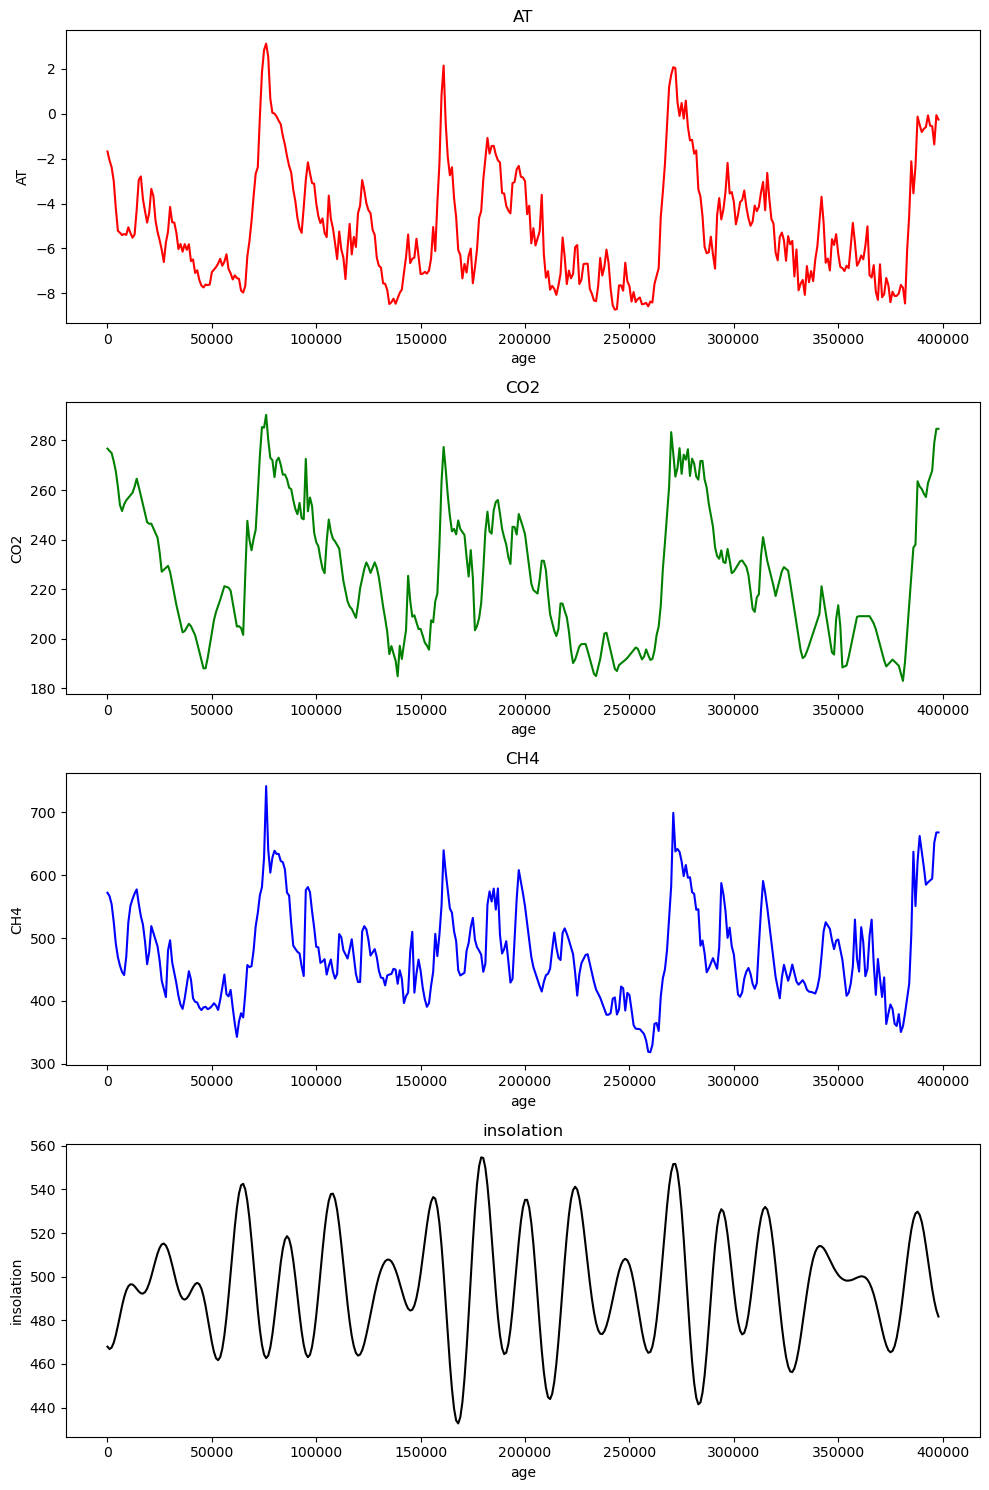

In [9]:
# read the csv files and plot the data
df_AT = pd.read_csv(r"D:\VScode\van2015_repeat\VOSTOK_data\AT.csv")
df_CO2 = pd.read_csv(r"D:\VScode\van2015_repeat\VOSTOK_data\CO2.csv")
df_CH4 = pd.read_csv(r"D:\VScode\van2015_repeat\VOSTOK_data\CH4.csv")
df_inso = pd.read_csv(r"D:\VScode\van2015_repeat\VOSTOK_data\insolation.csv")

fig, axs = plt.subplots(4, 1, figsize=(10, 15))

axs[0].plot(df_AT['age'], df_AT['AT'], color='r')
axs[0].set_title('AT')
axs[0].set_xlabel('age')
axs[0].set_ylabel('AT')

axs[1].plot(df_CO2['age'], df_CO2['CO2'], color='g')
axs[1].set_title('CO2')
axs[1].set_xlabel('age')
axs[1].set_ylabel('CO2')

axs[2].plot(df_CH4['age'], df_CH4['CH4'], color='b')
axs[2].set_title('CH4')
axs[2].set_xlabel('age')
axs[2].set_ylabel('CH4')

axs[3].plot(df_inso['age'], df_inso['inso'], color='k')
axs[3].set_title('insolation')
axs[3].set_xlabel('age')
axs[3].set_ylabel('insolation')

plt.tight_layout()
plt.show()